# Práctico Análisis y Visualización de Datos 


**Objetivo y alcance:**

Se introducirá la miscelánea disponible para la inspección y visualización de la estadística descriptiva, estadística inferencial y probabilidad conjunta para cada una de las variables físicas de las galaxias, herramientas suficientes para determinar la distribución y estadisticos de las cantidades físicas que caracterizan al dataset y como éstas están relacionadas.

**Método:**
El objetivo será hecho a través de las librerías de python dedicadas a la examinación y visualización, principalmente con librerías como: pandas, numpy, seaborn, matplotlib y scipy. En la parte estadística se estudiarán los intercuartiles, valores extremos, *outliers* y las distribuciones que sigue cada una de las variables ajustadas a la distribución normal, las mismas tambien se visualizarán a través de histogramas y boxplots.  Usando métodos probabilisticos como el teorema de Bayes, chi-cuadrado y el intervalo de confianza de la mediana en los boxplots se verá la correlación entre estas variables.


Estructura del informe:
- Presentación de los datos;
- Visualización de datos categóricos y numéricos;
- Valores explícitos característicos de la distribución de algunas de las variables;
- Vizualización de la distribución con los valores característicos de la misma;
- Ajuste de la distribución a una Normal;
- Examinación de distribuciones de probabilidades discretas y continuas;
- Correlación entre las variables;
- Visualización de correlación entre variables usando mapas de calor;
- Conclusiones.

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0. 

# Paquetes 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import scipy as sp
import numpy as np
import matplotlib.patches as mpatches


# Carga de Datos

In [5]:
data = pd.read_csv('galaxias.csv', sep=',')

In [6]:
display('Head',data.head(4))
display('Tamaño (filas, columnas)',data.shape)
display('Valores faltantes',data.notnull().all().to_frame())
display('Estadísticos del dataset',data.describe())

'Head'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1


'Tamaño (filas, columnas)'

(92102, 13)

'Valores faltantes'

,0
ra,True
dec,True
Mag_u,True
Mag_g,True
Mag_r,True
Mag_i,True
Mag_z,True
R,True
z,True
color,True


'Estadísticos del dataset'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,181.086338,24.723737,18.143378,16.708392,16.312647,15.991780,15.433421,9.459875,0.036092,-1.830732,0.089651,0.326225,0.584124
std,61.177151,18.853785,46.690487,46.684358,1.092588,1.151259,57.168725,5.248708,0.008435,46.686363,0.285682,0.468833,0.492875
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,0.842248,0.020001,-13.484570,0.000000,0.000000,0.000000
25%,150.287271,9.115292,17.725203,16.251015,15.562648,15.197173,14.910782,6.117609,0.029082,-2.510555,0.000000,0.000000,0.000000
50%,183.219954,23.111344,18.442490,17.082385,16.491180,16.171225,15.934050,8.361149,0.036321,-1.994779,0.000000,0.000000,1.000000
75%,222.722975,38.982500,19.028265,17.720817,17.209298,16.928400,16.736465,11.345535,0.043620,-1.606971,0.000000,1.000000,1.000000
max,359.965567,70.133213,28.787190,25.526970,27.911470,25.657780,26.923540,231.121800,0.050000,10015.860000,1.000000,1.000000,1.000000


Analizo las cantidades de cada tipo de galaxia

In [7]:
count_elipticas = data.eliptica.value_counts()[1]
count_espirales = data.espiral.value_counts()[1]
count_irregulares = data.irregular.value_counts()[1]
count_total = count_elipticas + count_espirales + count_irregulares
prob_elipticas = ((count_elipticas/count_total) * 100).round(4)
prob_espirales = ((count_espirales/count_total) * 100).round(4)
prob_irregulares = ((count_irregulares/count_total) * 100).round(4)

print("Cantidad de elípticas " + str(count_elipticas))
print("Cantidad de espirales " + str(count_espirales))
print("Cantidad de irregulares " + str(count_irregulares) + "\n")
print("Probabilidad elípticas " + str(prob_elipticas) + " %")
print("Probabilidad espirales " + str(prob_espirales) + " %")
print("Probabilidad irregulares " + str(prob_irregulares) + " %")
print("\nTOTAL DE GALAXIAS: " + str(count_total))

Cantidad de elípticas 8257
Cantidad de espirales 30046
Cantidad de irregulares 53799

Probabilidad elípticas 8.9651 %
Probabilidad espirales 32.6225 %
Probabilidad irregulares 58.4124 %

TOTAL DE GALAXIAS: 92102


In [8]:
data_espiral = data.copy()
data_espiral = data_espiral.query("espiral == 1")
data_espiral.describe()

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,30046.000000,30046.000000,30046.000000,30046.000000,30046.000000,30046.000000,30046.000000,30046.000000,30046.000000,30046.000000,30046.0,30046.0,30046.0
mean,180.324280,24.528041,18.064487,16.651297,16.038310,15.703896,15.126881,11.910286,0.036080,-2.026176,0.0,1.0,0.0
std,61.452183,18.754681,1.018297,0.998711,1.055697,1.094737,57.785568,5.310629,0.008375,0.518564,0.0,0.0,0.0
min,0.019187,-11.202394,14.582810,13.047900,12.186040,11.774540,-9999.000000,1.290469,0.020001,-13.256300,0.0,1.0,0.0
25%,149.360449,9.056920,17.357003,15.941937,15.290880,14.930968,14.648440,8.425920,0.029204,-2.341086,0.0,1.0,0.0
50%,182.206998,22.838337,18.088325,16.718690,16.126360,15.792885,15.546885,10.792645,0.036243,-1.953508,0.0,1.0,0.0
75%,221.864343,38.768199,18.788367,17.430367,16.871065,16.563192,16.346240,14.074680,0.043443,-1.674970,0.0,1.0,0.0
max,359.921854,70.133213,28.269700,25.298320,20.621880,24.384180,25.259620,128.846800,0.049999,-0.395924,0.0,1.0,0.0


In [9]:
data_eliptica = data.copy()
data_eliptica = data_eliptica.query("eliptica == 1")
data_eliptica.describe()

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.0,8257.0,8257.0
mean,182.056163,24.479357,17.756558,15.940906,15.120556,14.722265,14.417579,11.434267,0.035441,-2.636002,1.0,0.0,0.0
std,61.817796,18.582081,0.934428,0.946335,0.969400,0.983670,0.992839,6.569001,0.008377,0.345875,0.0,0.0,0.0
min,0.166083,-11.157700,14.666610,12.591010,11.718730,11.287830,10.978390,1.423474,0.020001,-12.064770,1.0,0.0,0.0
25%,151.083448,8.875705,17.146740,15.319180,14.486650,14.078720,13.758610,7.127408,0.028338,-2.773696,1.0,0.0,0.0
50%,185.290733,23.277116,17.750520,15.949180,15.122840,14.722620,14.415800,9.830194,0.035387,-2.672904,1.0,0.0,0.0
75%,224.246090,38.588746,18.327470,16.535100,15.720680,15.331540,15.025460,13.911130,0.042901,-2.541204,1.0,0.0,0.0
max,359.873402,69.865567,27.404240,19.384310,18.203080,17.715010,20.173780,87.420200,0.049999,-0.951208,1.0,0.0,0.0


In [10]:
data_irregular = data.copy()
data_irregular = data_irregular.query("irregular == 1")
data_irregular.describe()

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,53799.000000,53799.000000,53799.000000,53799.000000,53799.000000,53799.000000,53799.000000,53799.000000,53799.000000,53799.000000,53799.0,53799.0,53799.0
mean,181.363089,24.870538,18.246807,16.858071,16.648820,16.347403,15.760530,7.788328,0.036198,-1.597987,0.0,0.0,1.0
std,60.920518,18.949111,61.084899,61.076397,0.950724,1.015448,61.072676,4.247871,0.008473,61.082830,0.0,0.0,0.0
min,0.008745,-11.178372,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,0.842248,0.020002,-13.484570,0.0,0.0,1.0
25%,150.548485,9.201519,18.094815,16.721125,16.091220,15.752720,15.488210,5.263126,0.029136,-2.456771,0.0,0.0,1.0
50%,183.516062,23.245262,18.691830,17.394830,16.858910,16.560760,16.352490,7.003353,0.036516,-1.872850,0.0,0.0,1.0
75%,222.932832,39.172057,19.163590,17.873645,17.386685,17.119615,16.948155,9.299470,0.043803,-1.523042,0.0,0.0,1.0
max,359.965567,70.002253,28.787190,25.526970,27.911470,25.657780,26.923540,231.121800,0.050000,10015.860000,0.0,0.0,1.0


<ipython-input-11-737269b16c4d>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


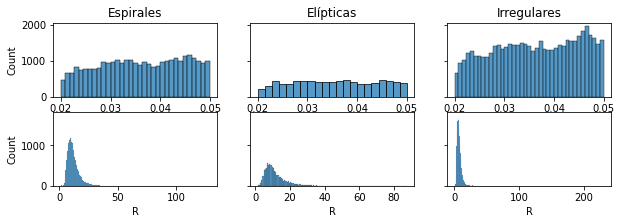

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,3), sharey='row')

# Espiral
seaborn.histplot(data=data_espiral.z, ax=ax[0,0])
seaborn.histplot(data=data_espiral.R, ax=ax[1,0])
#seaborn.histplot(data=data_espiral.z, ax=ax[2,0], stat="frequency")
#seaborn.histplot(data=data_espiral.R, ax=ax[3,0], stat="frequency")

# Eliptica
seaborn.histplot(data=data_eliptica.z, ax=ax[0,1])
seaborn.histplot(data=data_eliptica.R, ax=ax[1,1])
#seaborn.histplot(data=data_eliptica.z, ax=ax[2,1], stat="frequency")
#seaborn.histplot(data=data_eliptica.R, ax=ax[3,1], stat="frequency")

# Irregular
seaborn.histplot(data=data_irregular.z, ax=ax[0,2])
seaborn.histplot(data=data_irregular.R, ax=ax[1,2])
#seaborn.histplot(data=data_irregular.z, ax=ax[2,2], stat="frequency")
#seaborn.histplot(data=data_irregular.R, ax=ax[3,2], stat="frequency")

ax[0,0].set_title('Espirales')
ax[0,1].set_title('Elípticas')
ax[0,2].set_title('Irregulares')

#ax[1,0].set_title('Espirales')
#ax[1,1].set_title('Eliptica')
#ax[1,2].set_title('Irregulares')

fig.show()

# Clases

Defino una nueva columna de tipo categórico para concatenar la clase o tipo morfologíco de las galaxias.

In [12]:
clase=[]
for i in range(0,data.shape[0]):
    if data.eliptica[i]==1:
        clase.append('E')
    elif data.espiral[i]==1:
        clase.append('S')
    elif data.irregular[i]==1:
        clase.append('I')
data['clase']=clase
data.head(2)

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular,clase
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1,I
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0,S


# Visualización

Encuentre una forma adecuada para exhibir el balance de las clase eliptica (E), espiral (S) e irregular (I) usando la nueva columna clase.

Use histogramas y boxplots para visualizar intervalos de confianza, mediana, media, intercuartiles y *outliers* de la posición **z** y del tamaño **R** para algun tipo morfologíco.

Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

<AxesSubplot:xlabel='z', ylabel='clase'>

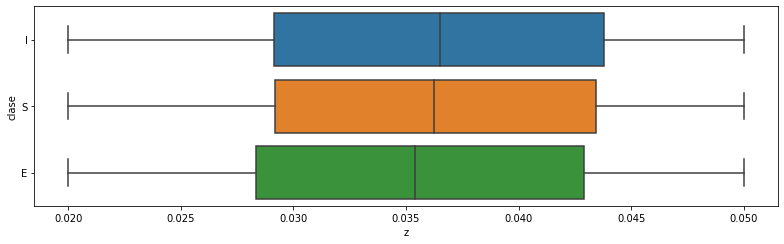

In [154]:
seaborn.boxplot(data=data, x="z", y="clase")

<AxesSubplot:xlabel='z'>

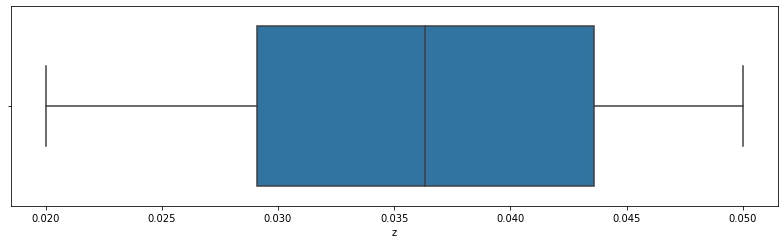

In [153]:
seaborn.boxplot(data=data, x="z")

In [48]:
data.columns

Index(['ra', 'dec', 'Mag_u', 'Mag_g', 'Mag_r', 'Mag_i', 'Mag_z', 'R', 'z',
       'color', 'eliptica', 'espiral', 'irregular', 'clase'],
      dtype='object')

In [109]:
data[['Mag_u','Mag_g','Mag_r','Mag_i','Mag_z','color']].describe()

,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,color
count,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,18.143378,16.708392,16.312647,15.991780,15.433421,-1.830732
std,46.690487,46.684358,1.092588,1.151259,57.168725,46.686363
min,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,-13.484570
25%,17.725203,16.251015,15.562648,15.197173,14.910782,-2.510555
50%,18.442490,17.082385,16.491180,16.171225,15.934050,-1.994779
75%,19.028265,17.720817,17.209298,16.928400,16.736465,-1.606971
max,28.787190,25.526970,27.911470,25.657780,26.923540,10015.860000


In [126]:
def remove_min(data_aux,column):
    with_error_condition = data_aux[data_aux[column] == data_aux[column].min()]
    without_error_condition = data_aux[data_aux[column] > data[column].min()]
    with_error = with_error_condition.count()[column]
    print(column + ": Hay " + str(with_error) + " con valor " + str(data[column].min()))
    print(column + ": Hay " + str(without_error_condition.count()[column]) + " sin valor " + str(data[column].min()))

In [128]:
remove_min(data,'Mag_u')
remove_min(data,'Mag_g')
remove_min(data,'Mag_z')

Mag_u: Hay 2 con valor -9999.0
Mag_u: Hay 92100 sin valor -9999.0
Mag_g: Hay 2 con valor -9999.0
Mag_g: Hay 92100 sin valor -9999.0
Mag_z: Hay 3 con valor -9999.0
Mag_z: Hay 92099 sin valor -9999.0


El valor -9999 parece ser algún tipo de error o porque no existe o está corrupto, al filtrar este valor se puede observar que son solamente 2, el desvío estándar se ve modificado.

In [150]:
# (x - media) / (desvio / raiz de N)
mag_u_std = data[data.Mag_u > data.Mag_u.min()].Mag_u.std()
data['media_mag_u'] = (data[data.Mag_u > data.Mag_u.min()].Mag_u - data[data.Mag_u > data.Mag_u.min()].Mag_u.mean()) / (mag_u_std / np.square(len(data[data.Mag_u > data.Mag_u.min()].Mag_u)))
data['media_mag_u']

0        4.505659e+09
1        1.583365e+10
2        4.207491e+09
3        7.988674e+09
4       -2.350921e+09
             ...     
92097   -6.065336e+08
92098    1.239135e+09
92099    6.395262e+09
92100    5.182728e+09
92101    3.999599e+09
Name: media_mag_u, Length: 92102, dtype: float64

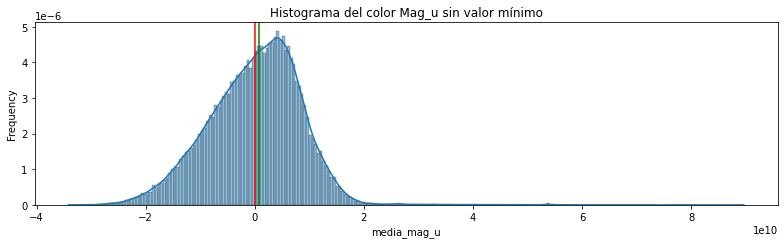

In [152]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
df_mag_u = data[data.Mag_u > data.Mag_u.min()]['Mag_u']
ax = seaborn.histplot(data=data['media_mag_u'], kde=True, stat="frequency")
plt.axvline(data['media_mag_u'].mean(), color='red')
plt.axvline(data['media_mag_u'].median(), color='green')
#ax.lines[0].remove()
plt.title("Histograma del color Mag_u sin valor mínimo")
plt.show()

Al ver el desvío de +-2 podemos decir que hay una gran dispersión de datos, está sesgado hacia la derecha. En el 0 están los 50% de los valores. Para mas de 50% de los valores hay un desvío muy grande que supera el 8 (de la x)

In [146]:
sp.stats.chisquare(data[data.Mag_u > data.Mag_u.min()].Mag_u)

Power_divergenceResult(statistic=4882.414577465374, pvalue=1.0)

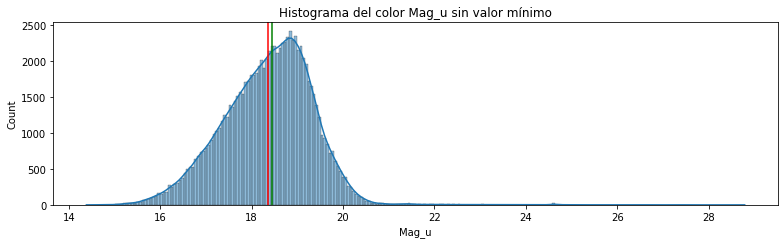

In [142]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
df_mag_u = data[data.Mag_u > data.Mag_u.min()]['Mag_u']
ax = seaborn.histplot(data=df_mag_u, kde=True, stat="count")
plt.axvline(df_mag_u.mean(), color='red')
plt.axvline(df_mag_u.median(), color='green')
#ax.lines[0].remove()
plt.title("Histograma del color Mag_u sin valor mínimo")
plt.show()

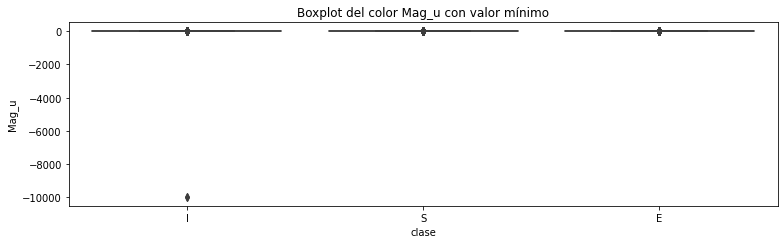

In [131]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.boxplot(data=data, y='Mag_u', x='clase')
#ax.lines[0].remove()
plt.title("Boxplot del color Mag_u con valor mínimo")
plt.show()

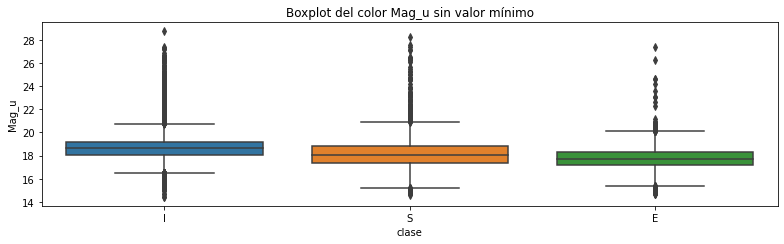

In [132]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.boxplot(data=data[data.Mag_u > data.Mag_u.min()], y='Mag_u', x='clase')
#ax.lines[0].remove()
plt.title("Boxplot del color Mag_u sin valor mínimo")
plt.show()

<AxesSubplot:xlabel='clase', ylabel='z'>

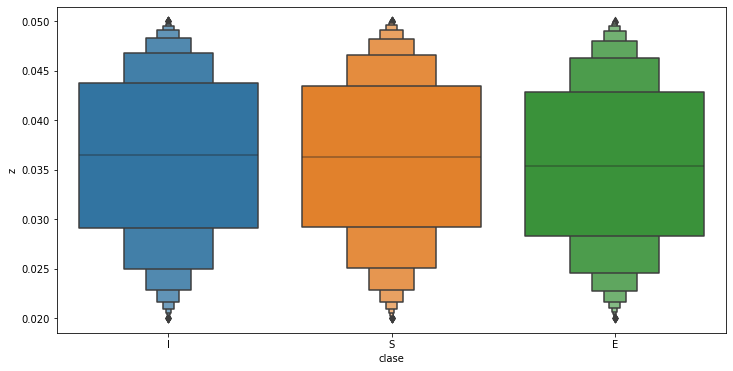

In [17]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=data, x="clase", y="z")

<AxesSubplot:xlabel='clase', ylabel='R'>

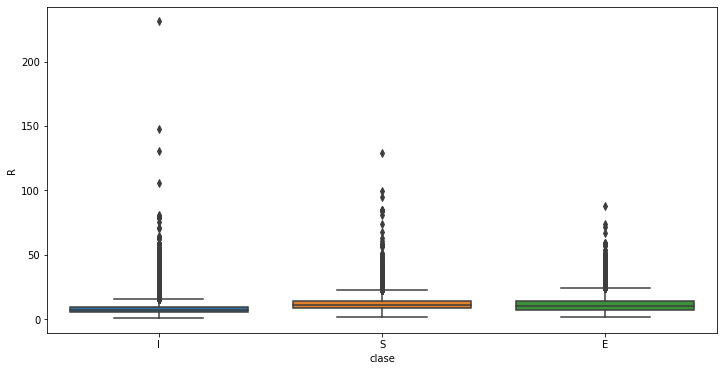

In [18]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=data, x="clase", y="R")

<AxesSubplot:xlabel='clase', ylabel='R'>

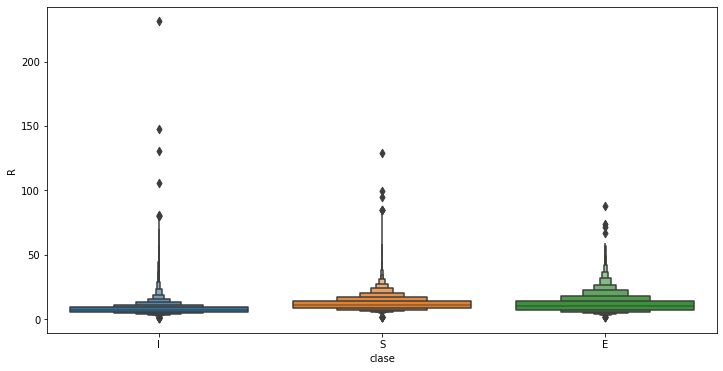

In [19]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=data, x="clase", y="R")

<AxesSubplot:xlabel='clase', ylabel='R'>

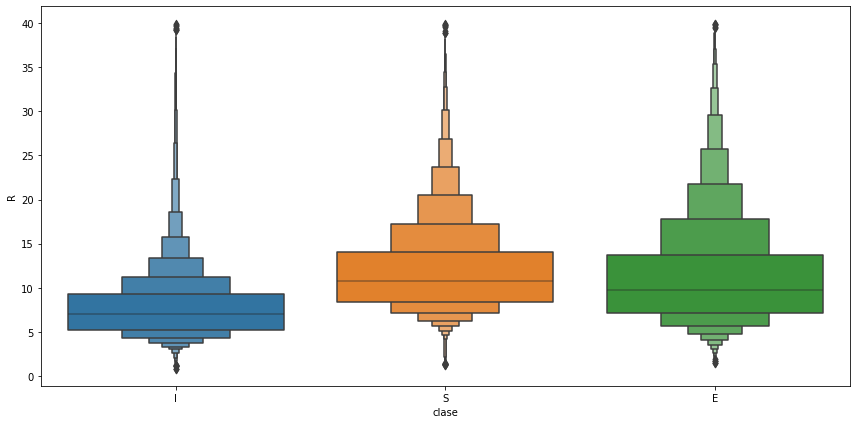

In [61]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=data.query("R < 40"), x="clase", y="R")

<AxesSubplot:xlabel='clase', ylabel='R'>

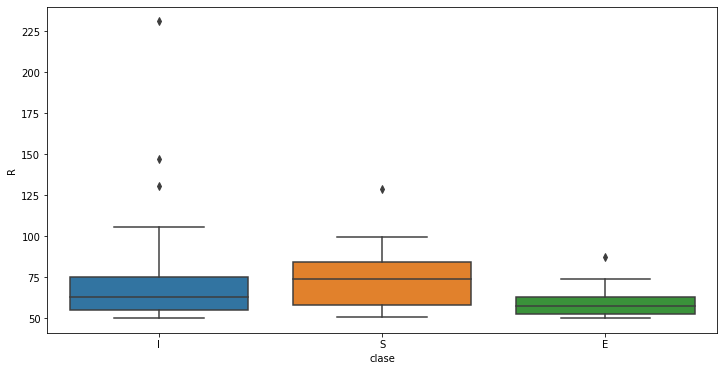

In [21]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=data.query("R > 50"), x="clase", y="R")

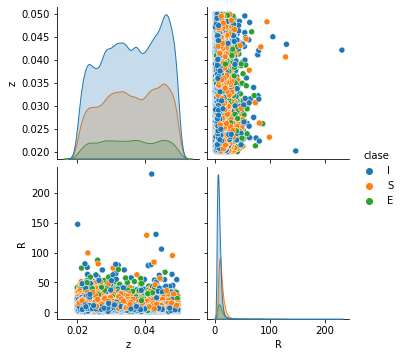

In [22]:
seaborn.pairplot(data=data[['z','R','clase']], hue="clase")

In [23]:
r_mean = data.R.mean()
z_mean = data.z.mean()
r_median = data.R.median()
z_median = data.z.median()
print("La media de R es: " + str(r_mean))
print("La mediana de R es: " + str(r_median))
print("La media de z es: " + str(z_mean))
print("La mediana de z es: " + str(z_median))

La media de R es: 9.45987527944887
La mediana de R es: 8.361149000000001
La media de z es: 0.03609202654947775
La mediana de z es: 0.03632125


In [24]:
dif_median_eliptica = data_espiral.z.median() + data_irregular.z.median() - data_eliptica.z.median()
dif_median_espiral = data_eliptica.z.median() + data_irregular.z.median() - data_espiral.z.median()
dif_median_eliptica = data_espiral.z.median() + data_eliptica.z.median() - data_irregular.z.median()

print("La mediana de z para galaxias elipticas " + str(data_eliptica.z.median()))
print("Diferencia " + str(data_espiral.z.median() - data_eliptica.z.median()))
print("La mediana de z para galaxias espiral " + str(data_espiral.z.median()))
print("Diferencia " + str(data_irregular.z.median() - data_espiral.z.median()))
print("La mediana de z para galaxias irregular " + str(data_irregular.z.median()))

La mediana de z para galaxias elipticas 0.0353871
Diferencia 0.0008557200000000043
La mediana de z para galaxias espiral 0.03624282
Diferencia 0.0002727000000000007
La mediana de z para galaxias irregular 0.03651552


La distancia de las galaxias debe ser regular a la rotación del planeta desde donde se lo observa

In [59]:
data[['z','R','clase']].groupby('clase').describe()

z                                                              \
         count      mean       std       min       25%       50%       75%   
clase                                                                        
E       8257.0  0.035441  0.008377  0.020001  0.028338  0.035387  0.042901   
I      53799.0  0.036198  0.008473  0.020002  0.029136  0.036516  0.043803   
S      30046.0  0.036080  0.008375  0.020001  0.029204  0.036243  0.043443   

                       R                                                      \
            max    count       mean       std       min       25%        50%   
clase                                                                          
E      0.049999   8257.0  11.434267  6.569001  1.423474  7.127408   9.830194   
I      0.050000  53799.0   7.788328  4.247871  0.842248  5.263126   7.003353   
S      0.049999  30046.0  11.910286  5.310629  1.290469  8.425920  10.792645   

                           
            75%       max  
clase                      
E      13.91113   87.4202  
I       9.29947  231.1218  
S      14.07468  128.8468

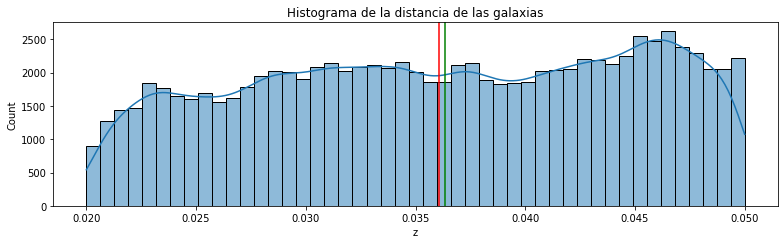

In [26]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data.z, kde=True)
plt.axvline(data.z.mean(), color='red')
plt.axvline(data.z.median(), color='green')
#ax.lines[0].remove()
plt.title("Histograma de la distancia de las galaxias")
plt.show()

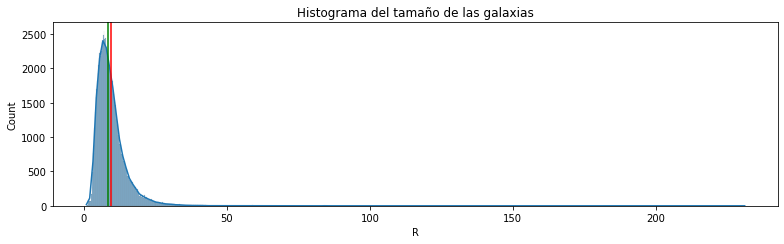

In [27]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data.R, kde=True)
plt.axvline(data.R.mean(), color='red')
plt.axvline(data.R.median(), color='green')
plt.title("Histograma del tamaño de las galaxias")
#ax.lines[0].remove()
plt.show()

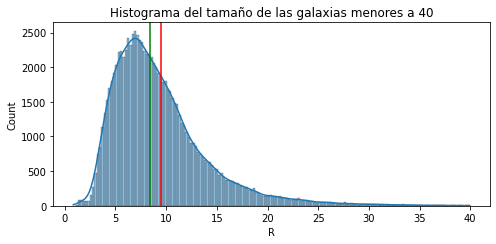

In [60]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data.query("R < 40").R, kde=True)
plt.axvline(data.R.mean(), color='red')
plt.axvline(data.R.median(), color='green')
plt.title("Histograma del tamaño de las galaxias menores a 40")
#ax.lines[0].remove()
plt.show()

In [29]:
data.R.mode()

0    10.49015
1    12.28631
dtype: float64

In [30]:
data.z.mode()

0     0.022726
1     0.023508
2     0.024251
3     0.024721
4     0.031160
5     0.031389
6     0.032256
7     0.040228
8     0.040495
9     0.041771
10    0.041967
11    0.042737
12    0.045363
13    0.046149
14    0.046720
dtype: float64

In [31]:
data.z.std()**2 ## Varianza

7.115332945870149e-05

In [32]:
# Coeficiente de variación es la desviación estándar dividida la media muestral. Para comparar entre v.a.
print("Coeficiente de variación")
print("Distancia z:", sp.stats.variation(data.z))
print("Tamaño R:", sp.stats.variation(data.R))

Coeficiente de variación
Distancia z: 0.23371360128894872
Tamaño R: 0.5548359698768583


In [33]:
# coeficiente de asimetría
# asimetría = 0 => Distribución simétrica
# asimetría > 0 => Distribución asimétrica a la derecha
# asimetría < 0 => Distribución asimétrica a la izquierda
data[['z','R']].skew()

z   -0.113291
R    3.905399
dtype: float64

In [34]:
# Coeficiente de asimetría con quantiles
# asimetría = 0 => Distribución simétrica
# asimetría > 0 => Distribución asimétrica a la derecha
# asimetría < 0 => Distribución asimétrica a la izquierda
def quartile_skew(x):
  q = x.quantile([.25, .50, .75])
  return ((q[0.75] - q[0.5]) - (q[0.5] - q[0.25])) / (q[0.75] - q[0.25])

In [35]:
print(quartile_skew(data.z))
print(quartile_skew(data.R))

0.004086748300742492
0.14170924170414373


In [36]:
# Distribución usando kurtosis
# Si kurtosis < 3 la distribución es Platicúrtica -^-
# Si kurtosis = 3 la distribución es Mesocúrtica ---
# Si kurtosis > 3 la distribución es Leptocúrtica -|-
data[['z','R']].kurt()

z    -1.170660
R    63.526375
dtype: float64

Una curtosis grande implica una mayor concentración de valores de la variable tanto muy cerca de la media de la distribución (pico) como muy lejos de ella (colas), al tiempo que existe una relativamente menor frecuencia de valores intermedios.

Esto explica una forma de la distribución de frecuencias/probabilidad con colas más gruesas, con un centro más apuntado y una menor proporción de valores intermedios entre el pico y colas.

**Una mayor curtosis no implica una mayor varianza, ni viceversa.**

In [62]:
def calc_percentile(percentile,data,columna):
    percentile_calculado = data.z.quantile(percentile / 100)
    n_below = len(data[data.z < percentile_calculado])
    n_above = len(data[data.z > percentile_calculado])
    print('Percentil {} de la columna {}: {}'.format(percentile, columna, percentile_calculado))
    print('% de datos menor que percentil {}: {}'.format(k, n_below / len(data)))
    print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(data)))

In [63]:
calc_percentile(90,data,'z')

Percentil 90 de la columna z: 0.047277679
% de datos menor que percentil 90: 0.8999913139779809
% de datos mayor que percentil 90: 0.10000868602201907


<AxesSubplot:xlabel='z'>

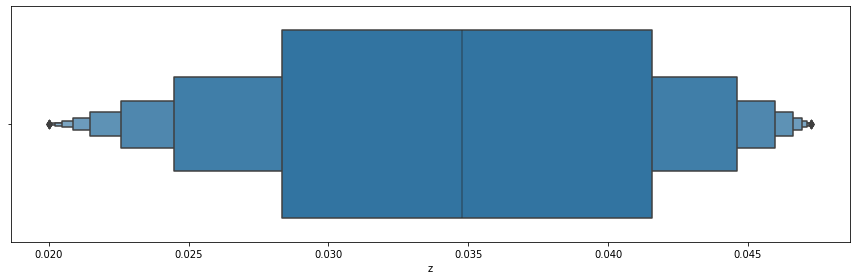

In [38]:
plt.figure(figsize=(12, 4))
max_limit = data.z.quantile(.90)
seaborn.boxenplot(x=data[data['z'] < max_limit]['z'])

In [39]:
def clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

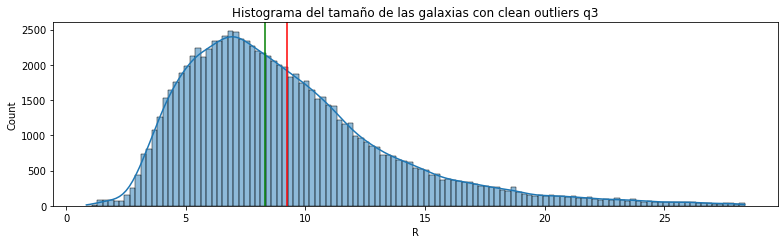

In [40]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
data_clean_q3 = clean_outliers_q3(data,'R')['R']
ax = seaborn.histplot(data_clean_q3, kde=True)
plt.axvline(data_clean_q3.mean(), color='red')
plt.axvline(data_clean_q3.median(), color='green')
plt.title("Histograma del tamaño de las galaxias con clean outliers q3")
#ax.lines[0].remove()
plt.show()

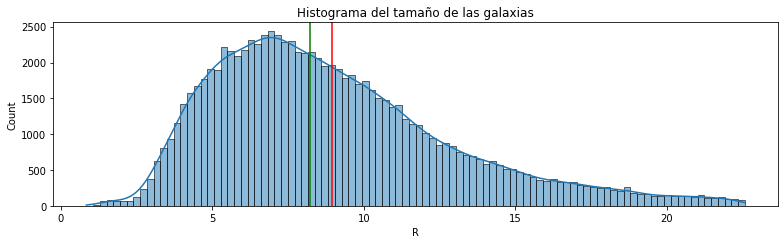

In [41]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
data_clean_sd = clean_outliers_sd(data,'R')['R']
ax = seaborn.histplot(data_clean_sd, kde=True)
plt.axvline(data_clean_sd.mean(), color='red')
plt.axvline(data_clean_sd.median(), color='green')
plt.title("Histograma del tamaño de las galaxias")
#ax.lines[0].remove()
plt.show()

In [42]:
def remove_outlier(df_in, col_name, iqr_factor):
    """
  IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
  accept a dataframe, remove outliers, return cleaned data in a new dataframe
  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
  """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # interquartile range
    fence_low = q1 - iqr_factor * iqr
    fence_high = q3 + iqr_factor * iqr
    df_inliers = df_in.loc[
        (df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)
    ]
    df_outliers = df_in.loc[
        (df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)
    ]
    return df_inliers, df_outliers

In [43]:
iqr_factor = 2.5
df_main_inliers, df_main_outliers = remove_outlier(data, "R", iqr_factor)
df_main_inliers.shape, df_main_outliers.shape

((90522, 14), (1580, 14))

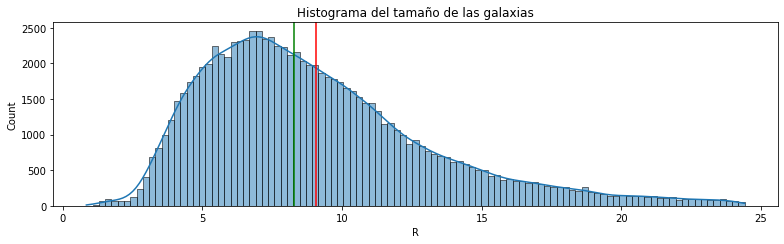

In [44]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(df_main_inliers.R, kde=True)
plt.axvline(df_main_inliers.R.mean(), color='red')
plt.axvline(df_main_inliers.R.median(), color='green')
plt.title("Histograma del tamaño de las galaxias")
#ax.lines[0].remove()
plt.show()

<ipython-input-45-fc3fc3a445ac>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


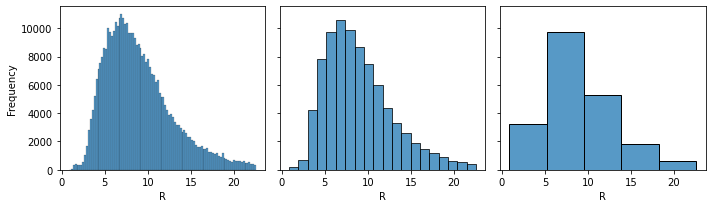

In [45]:
data_clean_sd = clean_outliers_sd(data,'R')['R']
fig, ax = plt.subplots(ncols=3, figsize=(10,3), sharey='row')


seaborn.histplot(data_clean_sd.dropna(), ax=ax[0], stat='frequency')
seaborn.histplot(data_clean_sd.dropna(), ax=ax[1], bins=20, stat='frequency')
seaborn.histplot(data_clean_sd.dropna(), ax=ax[2], bins=5, stat='frequency')

fig.show()

# Valores característicos 

Mostrar los valores explícitos característicos de la distribución **z** de las galaxias elípticas, espirales, irregulares.

In [46]:
p_above_avg = len(data['z'] >= data['z'].mean()) / len(data)
p_above_avg

1.0

In [47]:
data.groupby('clase').describe()

ra                                                           \
         count        mean        std       min         25%         50%   
clase                                                                     
E       8257.0  182.056163  61.817796  0.166083  151.083448  185.290733   
I      53799.0  181.363089  60.920518  0.008745  150.548485  183.516062   
S      30046.0  180.324280  61.452183  0.019187  149.360449  182.206998   

                                   dec             ... espiral      irregular  \
              75%         max    count       mean  ...     75%  max     count   
clase                                              ...                          
E      224.246090  359.873402   8257.0  24.479357  ...     0.0  0.0    8257.0   
I      222.932832  359.965567  53799.0  24.870538  ...     0.0  0.0   53799.0   
S      221.864343  359.921854  30046.0  24.528041  ...     1.0  1.0   30046.0   

                                          
      mean  std  min  25%  50%  75%  max  
clase                                     
E      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
I      1.0  0.0  1.0  1.0  1.0  1.0  1.0  
S      0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 104 columns]

# Distribución Normal

- Grafique la distribución Normal variando sus estadísticos. Realice una breve descripción de los cambios que nota en estos.

Algunos valores físicos de las galaxias no pueden ser determinados. Muchas veces la alternativa al usual *NaN* es llenar la celda del valor faltante con cero o con números de valor muy grande o muy chico discordantes a los valores usuales que toma la cantidad física. 

Se puede optar por ignorar dicho número o remplazarlo por cero, el valor medio o eliminarlo en el caso que el dataset sea de una gran dimensión.

El caso anteriormente se observa con la variable *color* donde dos de las galaxias no tienen su color determinado. 

- Dele solución 
- Ajuste la distribución de la variable **color** con el tamaño del bin=0.1 a una Normal usando *sns.distplot* 
- Explique que observa

# Probabilidad

- Calcule la Probabilidad marginal de cada tipo morfologico y grafiquela.

- Calcule la probabilida conjunta las galaxias de clase = E con el color  mayor a -2.1

- Analice la correlación entre dos de las variables a través de chi-cuadrado. Muestre esta correlación a través de mapas de calor.

# Conclusiones: